In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Sample wine data
wine_data = pd.read_csv('./Resources/wine_quality.csv')

# Map the 'quality' values to 0 for qualities 3, 4, 5 and 1 for qualities 6, 7, 8
wine_data['Quality_Category'] = wine_data['quality'].map({3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1})

# Initialize the StandardScaler
scaler = StandardScaler()

# Separate features and target variable
X = wine_data.drop(['Quality_Category', 'quality'], axis=1)
y = wine_data['Quality_Category']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the features using StandardScaler
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_sc, y_train)



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg.predict(X_test_sc)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

conf_matrix

array([[110,  31],
       [ 53, 126]], dtype=int64)

In [3]:
print(class_report)

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       141
           1       0.80      0.70      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



In [4]:
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score for the model
balanced_acc = balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.7420262292483855

In [5]:
#!pip install -q tensorflow

In [6]:
import tensorflow as tf
import numpy as np
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
# Define the model - deep neural net i.e. the number of input features and hidden nodes for each layer.
input_features = X_train_resampled.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
# Using 'relu' as the activation function and 100 neurons
nn.add(tf.keras.layers.Dense(units=50, activation='relu', input_dim=input_features))

# Second hidden layer
# Using 'relu' as the activation function and 100 neurons
#nn.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Third hidden layer
# Using 'relu' as the activation function and 100 neurons
#nn.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Fourth hidden layer
# Using 'relu' as the activation function and 100 neurons
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Fifth hidden layer
# Using 'relu' as the activation function and 30 neurons
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
# Using 'sigmoid' as the activation function because this is a binary classification problem
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4761 (18.60 KB)
Trainable params: 4761 (18.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fit_model = nn.fit(X_train_resampled, y_train_resampled, epochs=50)

Epoch 1/50
43/43 [==============================] - 2s 5ms/step - loss: 0.6272 - accuracy: 0.6827
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7456
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7537
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 0.4952 - accuracy: 0.7611
Epoch 5/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7774
Epoch 6/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.7833
Epoch 7/50
43/43 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7811
Epoch 8/50
43/43 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.7951
Epoch 9/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7973
Epoch 10/50
43/43 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.7996
Epoch 11/50
43/43 [

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_sc, y_test, verbose=2)
model_loss, model_accuracy

10/10 - 0s - loss: 0.5844 - accuracy: 0.8000 - 327ms/epoch - 33ms/step


(0.5844027400016785, 0.800000011920929)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

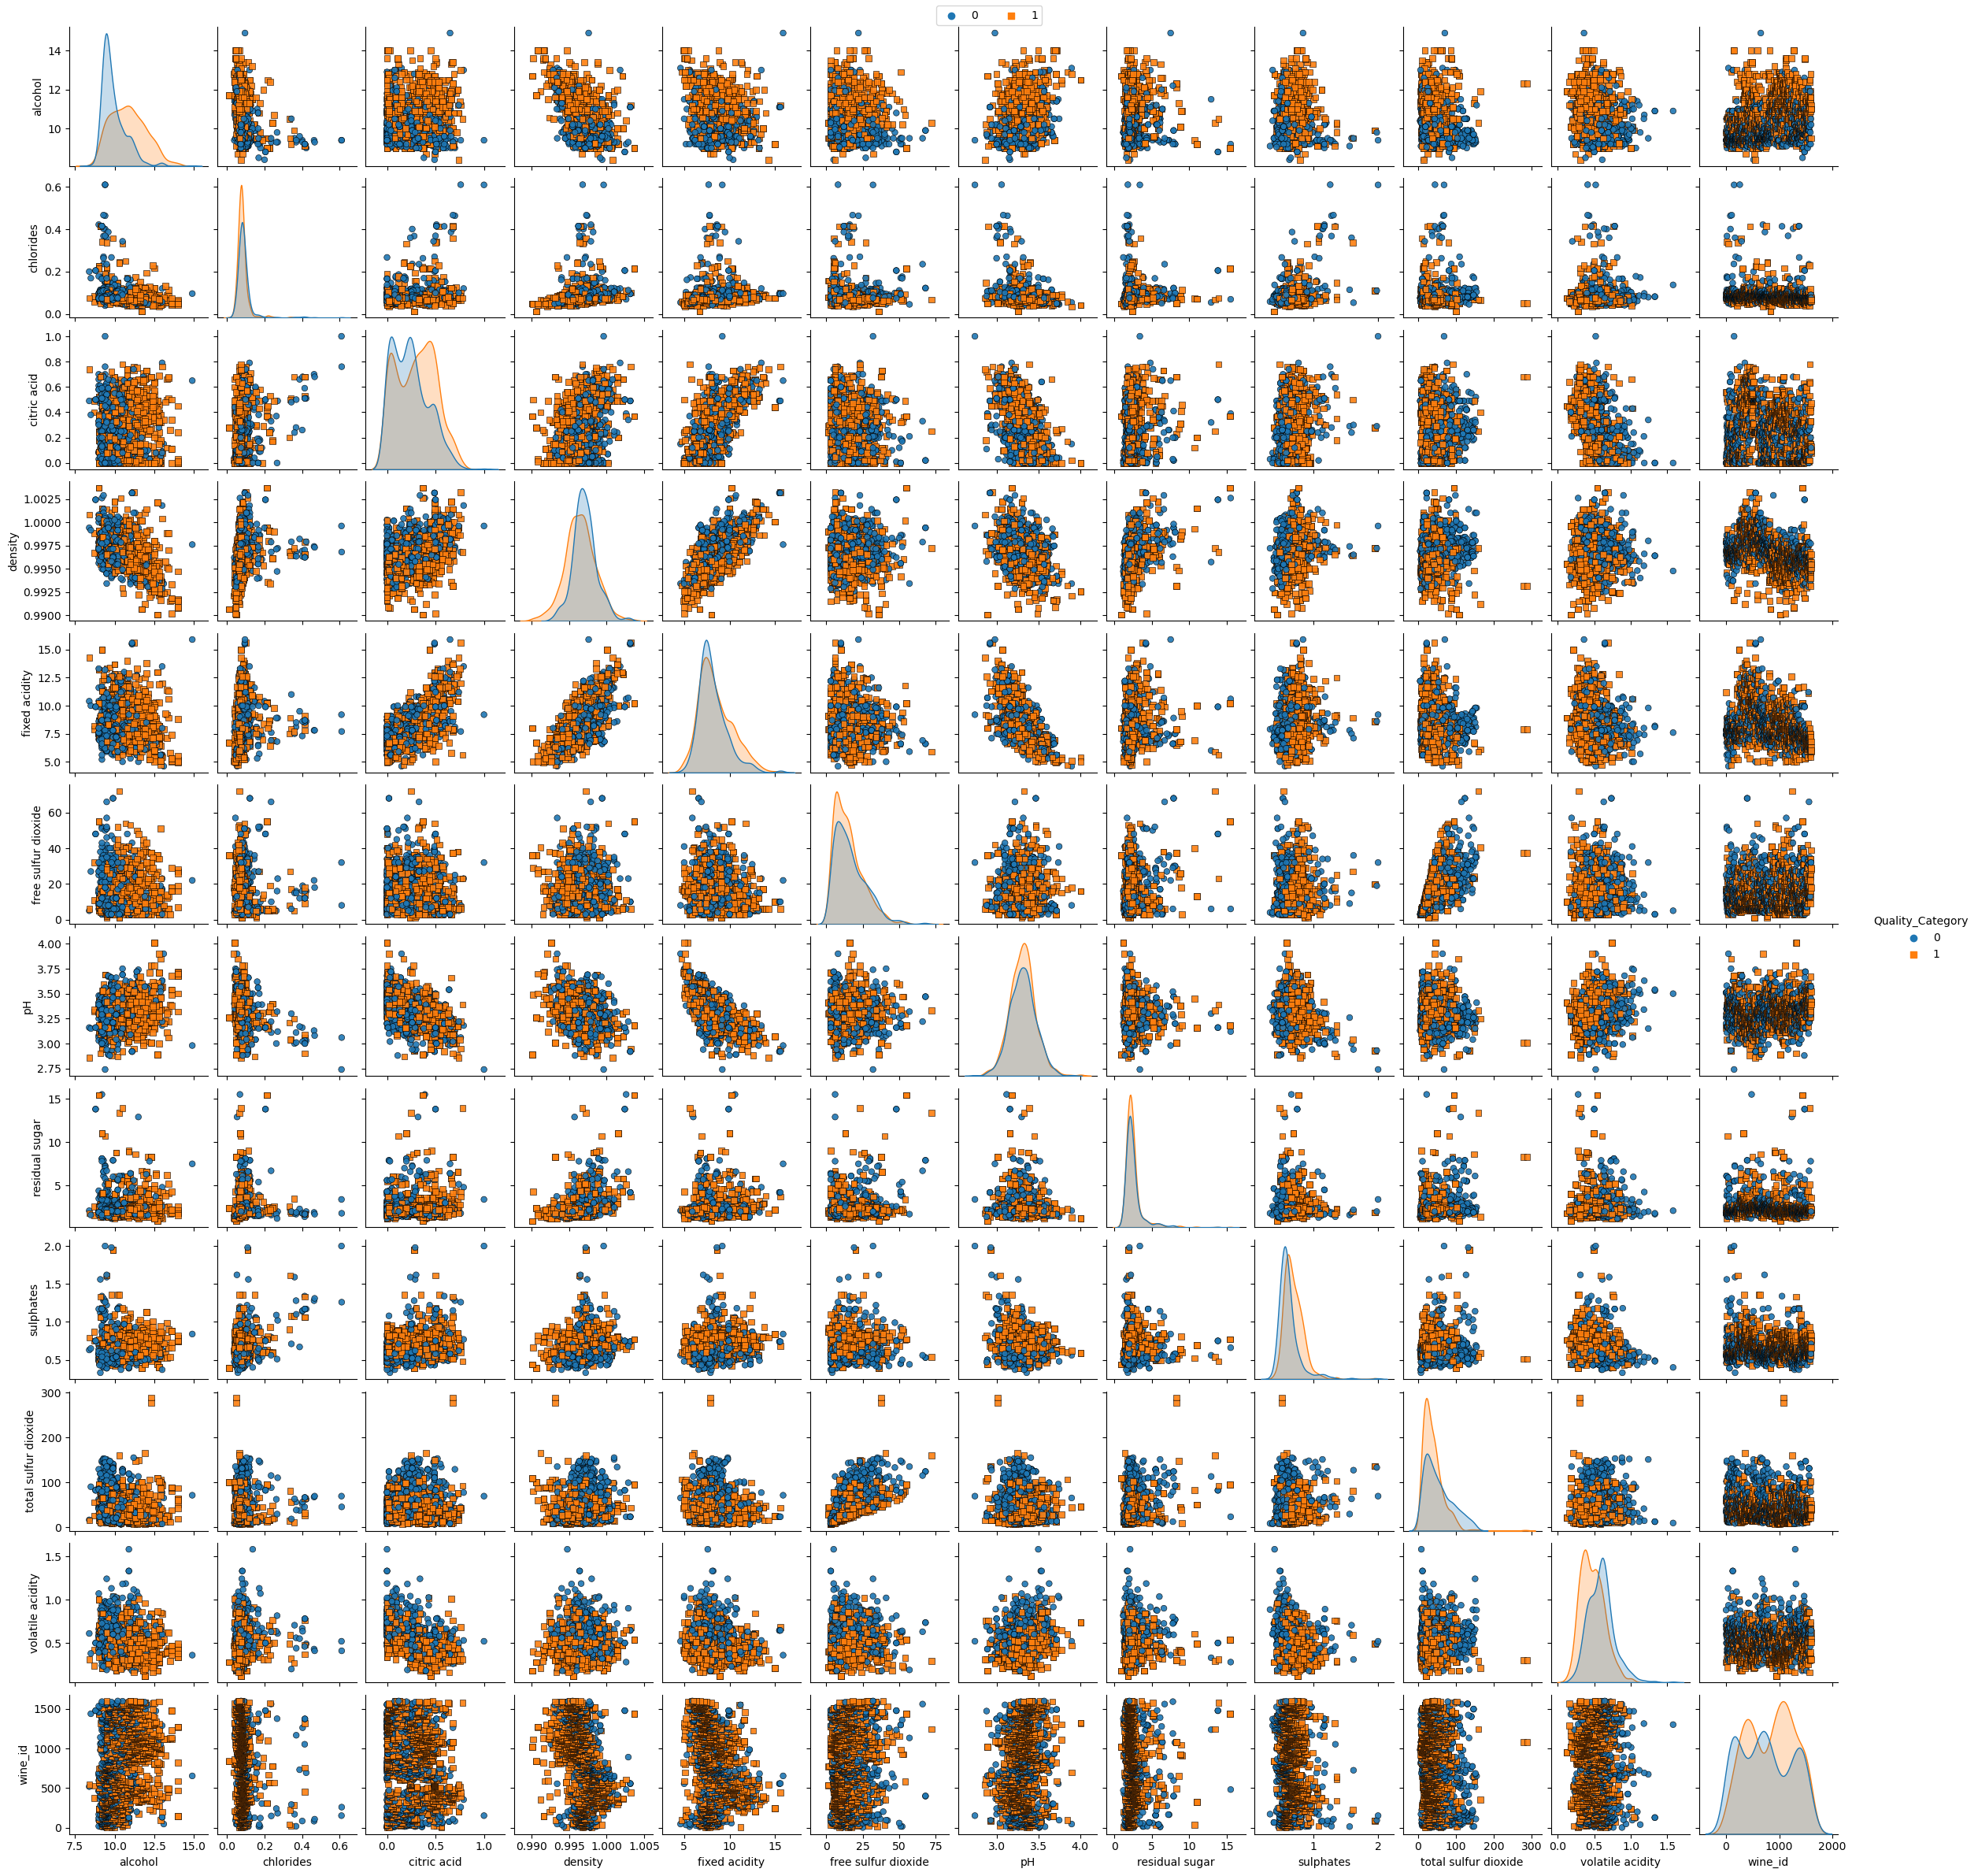

In [9]:
# Create a pairplot for only the X features (excluding 'Quality_Category' and 'quality')
feature_columns = wine_data.columns.difference(['Quality_Category', 'quality'])
g = sns.pairplot(wine_data, vars=feature_columns, hue='Quality_Category', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha':0.9, 's':30, 'edgecolor':'k'}, height=2)

# Remove the legend from each subplot
for ax in g.axes.flat:
    ax.legend().set_visible(False)

# Add a single legend outside the grid
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)

# Show the plot
plt.show()

In [10]:
from sklearn.decomposition import PCA

# Apply Standard Scaler to the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_data[feature_columns])

# Apply PCA
pca = PCA(n_components=7)
principal_components = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26795011, 0.16287927, 0.13413645, 0.10125803, 0.08035837,
       0.07308307, 0.05198287])

In [11]:
# Create a DataFrame to hold the principal components and their corresponding feature contributions
# Adjusting the index to match the actual number of principal components generated
pca_components_df = pd.DataFrame(pca.components_, columns=feature_columns, index=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
pca_components_df

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,wine_id
PC1,-0.138000,0.211247,0.439414,0.406576,0.477456,-0.037636,-0.420310,0.141109,0.233557,0.036519,-0.211923,-0.226264
PC2,-0.416119,0.135582,-0.203327,0.237155,-0.131391,0.460833,0.043426,0.237250,-0.068810,0.534981,0.324580,-0.163655
PC3,0.395341,-0.047531,0.246015,-0.268801,-0.091153,0.487856,-0.003036,0.169128,0.257169,0.371935,-0.406474,0.253080
PC4,-0.098485,0.647799,-0.074291,-0.192002,-0.238528,-0.036276,0.013685,-0.381665,0.562647,-0.024158,0.056992,-0.061663
PC5,0.295014,0.308196,-0.060111,0.162686,-0.063376,-0.153178,0.183678,0.728742,0.182580,-0.238626,0.258504,0.196259
PC6,0.210876,-0.238806,-0.015581,0.065408,-0.082985,-0.062825,0.429737,0.073897,0.262568,0.034008,-0.135756,-0.777487
PC7,0.520385,0.080203,0.041568,-0.291436,0.209742,-0.018530,-0.354777,-0.090995,-0.137318,0.225219,0.561809,-0.269095


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier model with a random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_sc)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Generate the classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Calculate the balanced accuracy score
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)

conf_matrix_rf

array([[107,  34],
       [ 31, 148]], dtype=int64)

In [13]:
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       141
           1       0.81      0.83      0.82       179

    accuracy                           0.80       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.80      0.80      0.80       320



In [14]:
print(balanced_acc_rf)

0.7928404453425255
